In [1]:
"""
Assignment 1 - main run method for mushroom dataset
"""
import sys
import pdb
sys.path.append("C:\\users\\mccar\\miniconda3\\lib\\site-packages")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve, GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from utils import learn_curve, val_curve

from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, Callback

In [2]:
# get data
DATA_PATH = "data/mnist/mnist_train.csv"
train_df = pd.read_csv(DATA_PATH)
DATA_PATH = "data/mnist/mnist_test.csv"
test_df = pd.read_csv(DATA_PATH)
print(train_df.shape)


(60000, 785)


In [3]:
# preprocessing
# none for now - dataset came with images already pixelated into numbers

In [5]:
# KNN
y_train = train_df["label"]
x_train = train_df.drop(["label"], axis=1)
y_test = test_df["label"]
x_test = test_df.drop(["label"], axis=1)

# Curve based on value of K - Validation curve
val_knn = False
if val_knn:
    k_accs = {}
    for k_val in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=k_val)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        k_accs[k_val] = accuracy_score(y_test, y_pred)
        print("K val: {}   acc: {}".format(k_val, k_accs[k_val]))
    val_curve(list(k_accs.keys()), list(k_accs.values()), "knn")

learn_knn = True
if learn_knn:
    # Shuffle the data without replacement - Learning curve
    x_accs = {}
    train_accs = {}
    for x_perc in range(1,11):
        x_perc = x_perc / 10
        # shuffled_data = shuffle(x_train, random_state=RANDOM_SEED)
        x_percent_index = int(x_perc * len(x_train))
        # Take the first X% of the shuffled data
        first_x_percent = x_train[:x_percent_index]
        y_train_iter = y_train[:x_percent_index]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(first_x_percent, y_train_iter)
        y_pred = knn.predict(x_test)
        x_accs[x_perc*10] = accuracy_score(y_test, y_pred)
        y_pred_train = knn.predict(x_train)
        train_accs[x_perc*10] = accuracy_score(y_train, y_pred_train)
        print("K val: {}   acc: {}".format(int(x_perc*10), x_accs[x_perc*10]))
    # learn_curve(list(x_accs.keys()), list(train_accs.values()), list(x_accs.values()), "knn")
    print("Train accs: ", train_accs)
    print("Test accs: ", x_accs)


K val: 1   acc: 0.9363
K val: 2   acc: 0.9491
K val: 3   acc: 0.9552
K val: 4   acc: 0.9588
K val: 5   acc: 0.9624
K val: 6   acc: 0.9657
K val: 7   acc: 0.9664
K val: 8   acc: 0.9674
K val: 9   acc: 0.9693
K val: 10   acc: 0.9705
Train accs:  {1.0: 0.9370833333333334, 2.0: 0.9541666666666667, 3.0: 0.9636333333333333, 4.0: 0.9692, 5.0: 0.9743833333333334, 6.0: 0.9774666666666667, 7.0: 0.9800166666666666, 8.0: 0.9826166666666667, 9.0: 0.9850666666666666, 10.0: 0.9867166666666667}
Test accs:  {1.0: 0.9363, 2.0: 0.9491, 3.0: 0.9552, 4.0: 0.9588, 5.0: 0.9624, 6.0: 0.9657, 7.0: 0.9664, 8.0: 0.9674, 9.0: 0.9693, 10.0: 0.9705}


In [5]:
# Decision Tree
y_train = train_df["label"]
x_train = train_df.drop(["label"], axis=1)
y_test = test_df["label"]
x_test = test_df.drop(["label"], axis=1)

# DT - hyperparameter tuning - Validation curve
dt_max_depth = False

if dt_max_depth:
    # Max Depth
    # Define the range of values for the hyperparameter (e.g., max_depth)
    param_range = np.arange(1, 31)

    # Create a decision tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42)

    # Generate training and test scores using validation_curve
    train_scores, test_scores = validation_curve(
        dt_classifier, x_train, y_train, param_name="max_depth", param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=-1
    )

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Validation Curve for Decision Tree - Max Depth")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    # Plot the mean training scores
    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", marker='o')
    # Fill the area around the mean training scores
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
    # Plot the mean test scores
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", marker='o')
    # Fill the area around the mean test scores
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2, color="navy")
    plt.legend(loc="best")
    plt.savefig("pngs/validation_curve_dt_max_depth.png", dpi=300)
    plt.close()





In [6]:
# Min samples to split
# Define the range of values for the hyperparameter (e.g., max_depth)
dt_min_split = False

if dt_min_split:
    param_range = np.arange(0, 15)

    # Create a decision tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=13)

    # Generate training and test scores using validation_curve
    train_scores, test_scores = validation_curve(
        dt_classifier, x_train, y_train, param_name="min_samples_split", param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=-1
    )

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Validation Curve for Decision Tree - Min Samples Split")
    plt.xlabel("Min Samples Split")
    plt.ylabel("Accuracy")
    # Plot the mean training scores
    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", marker='o')
    # Fill the area around the mean training scores
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
    # Plot the mean test scores
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", marker='o')
    # Fill the area around the mean test scores
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2, color="navy")
    plt.legend(loc="best")
    plt.savefig("pngs/validation_curve_dt_min_samples_split.png", dpi=300)
    # plt.savefig("pngs/validation_curve_dt_min_samples_leaf.png", dpi=300)
    plt.close()


In [7]:
# Criterion

crit = False

if crit:
    # Define the range of values for the hyperparameter (e.g., max_depth)
    param_range = ['gini', 'entropy']

    # Create a decision tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=13)

    # Generate training and test scores using validation_curve
    train_scores, test_scores = validation_curve(
        dt_classifier, x_train, y_train, param_name="criterion", param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=-1
    )

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    print(test_scores_mean)
    plt.figure(figsize=(10, 6))
    plt.title("Validation Curve for Decision Tree - Criterion")
    plt.xlabel("Criterion")
    plt.ylabel("Accuracy")

    # Plot the mean training scores
    plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", marker='o')
    # Fill the area around the mean training scores
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
    # Plot the mean test scores
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", marker='o')
    # Fill the area around the mean test scores
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2, color="navy")
    plt.xticks(['gini', 'entropy'])
    plt.legend(loc="best")
    plt.savefig("pngs/validation_curve_dt_criterion.png", dpi=300)
    plt.close()

In [6]:
# DT - Amount of data - Learning curve
l_curve = True

if l_curve:
    x_accs = {}
    train_accs = {}
    for x_perc in range(1,11):
        x_perc = x_perc / 10
        x_percent_index = int(x_perc * len(x_train))
        # Take the first X% of the shuffled data
        first_x_percent = x_train[:x_percent_index]
        y_train_iter = y_train[:x_percent_index]
        dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=13)
        dec_tree.fit(first_x_percent, y_train_iter)
        y_pred = dec_tree.predict(x_test)
        x_accs[x_perc*10] = accuracy_score(y_test, y_pred)
        y_pred_train = dec_tree.predict(x_train)
        train_accs[x_perc*10] = accuracy_score(y_train, y_pred_train)
        print("Perc val: {}   acc: {}".format(int(x_perc*10), x_accs[x_perc*10]))
    # learn_curve(list(x_accs.keys()), list(train_accs.values()), list(x_accs.values()), "dec_tree")
    print("Train accs: ", train_accs)
    print("Test accs: ", x_accs)




Perc val: 1   acc: 0.782
Perc val: 2   acc: 0.8169
Perc val: 3   acc: 0.8457
Perc val: 4   acc: 0.8623
Perc val: 5   acc: 0.8662
Perc val: 6   acc: 0.8699
Perc val: 7   acc: 0.8763
Perc val: 8   acc: 0.8828
Perc val: 9   acc: 0.8827
Perc val: 10   acc: 0.8867
Train accs:  {1.0: 0.8031666666666667, 2.0: 0.8492833333333333, 3.0: 0.8849, 4.0: 0.9069166666666667, 5.0: 0.9259, 6.0: 0.9395833333333333, 7.0: 0.9539, 8.0: 0.9648333333333333, 9.0: 0.9746666666666667, 10.0: 0.9818}
Test accs:  {1.0: 0.782, 2.0: 0.8169, 3.0: 0.8457, 4.0: 0.8623, 5.0: 0.8662, 6.0: 0.8699, 7.0: 0.8763, 8.0: 0.8828, 9.0: 0.8827, 10.0: 0.8867}


In [9]:
# DT - epochs - Learning curve
dt_epoch = False

if dt_epoch:
    # Number of epochs
    epochs = 5

    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=13)
    x_accs = {}
    train_accs = {}
    # Loop through epochs
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}:")

        # Train the decision tree on the training set
        clf.fit(x_train, y_train)

        # Make predictions on the test set
        y_pred = clf.predict(x_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        x_accs[epoch+1] = accuracy_score(y_test, y_pred)
        y_pred_train = dec_tree.predict(x_train)
        train_accs[epoch+1] = accuracy_score(y_train, y_pred_train)
        print("Perc val: {}   acc: {}".format(epoch+1, x_accs[epoch+1]))
    learn_curve(list(x_accs.keys()), list(train_accs.values()), list(x_accs.values()), "dec_tree_epochs", x_axis="Epochs")



In [10]:
# Boosting Tree - Hyperparameter tuning - Validation curve
boost_gscv = False

if boost_gscv:
    # Create XGBoost classifier
    xgb_classifier = XGBClassifier()

    # Define hyperparameters to tune
    param_grid = {
        'n_estimators': [15, 50, 150, 200],
        'learning_rate': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        'min_child_weight': [1, 5, 10, 15],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    }

    # Set up cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create GridSearchCV object
    grid_search = GridSearchCV(
        estimator=xgb_classifier,
        param_grid=param_grid,
        scoring='accuracy',
        cv=cv,
        verbose=1,
        n_jobs=-1  # Use all available CPU cores
    )

    # Perform grid search
    grid_search.fit(x_train, y_train)

    # Display the best hyperparameters and corresponding accuracy
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)



In [11]:
# Boosting tree - Validation curve - max depth
bt_md = False

if bt_md:
    param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

    # Calculate mean and standard deviation for training and test scores
    # train_scores_mean = grid_search.cv_results_['mean_train_score']
    # train_scores_std = grid_search.cv_results_['std_train_score']
    test_scores_mean = grid_search.cv_results_['mean_test_score']
    test_scores_std = grid_search.cv_results_['std_test_score']

    plt.figure(figsize=(10, 6))
    plt.title("Validation Curve for Boosting Tree - Max Depth")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    # Plot the mean training scores
    # plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", marker='o')
    # # Fill the area around the mean training scores
    # plt.fill_between(param_range, train_scores_mean - train_scores_std,
    #                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
    # Plot the mean test scores
    plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy", marker='o')
    # Fill the area around the mean test scores
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2, color="navy")
    plt.legend(loc="best")
    plt.savefig("pngs/validation_curve_bt_min_samples_split.png", dpi=300)
    # plt.savefig("pngs/validation_curve_dt_min_samples_leaf.png", dpi=300)
    plt.close()

In [7]:
# BT - Learning Curve - amount of data
bt_lc = True

if bt_lc:
    x_accs = {}
    train_accs = {}
    for x_perc in range(1,11):
        x_perc = x_perc / 10
        x_percent_index = int(x_perc * len(x_train))
        # Take the first X% of the shuffled data
        first_x_percent = x_train[:x_percent_index]
        y_train_iter = y_train[:x_percent_index]
        xgb_classifier = XGBClassifier(n_estimators=150, learning_rate=0.6, max_depth=10,
                                       min_child_weight=5, subsample=0.9, colsample_bytree=1.0)
        xgb_classifier.fit(first_x_percent, y_train_iter)
        y_pred = xgb_classifier.predict(x_test)
        x_accs[x_perc*10] = accuracy_score(y_test, y_pred)
        y_pred_train = xgb_classifier.predict(x_train)
        train_accs[x_perc*10] = accuracy_score(y_train, y_pred_train)
        print("Perc val: {}   acc: {}".format(int(x_perc*10), x_accs[x_perc*10]))
    # learn_curve(list(x_accs.keys()), list(train_accs.values()), list(x_accs.values()), "boost_tree")
    print("Train accs: ", train_accs)
    print("Test accs: ", x_accs)

Perc val: 1   acc: 0.9324
Perc val: 2   acc: 0.9486
Perc val: 3   acc: 0.9593
Perc val: 4   acc: 0.9644
Perc val: 5   acc: 0.9672
Perc val: 6   acc: 0.9712
Perc val: 7   acc: 0.9713
Perc val: 8   acc: 0.9739
Perc val: 9   acc: 0.9759
Perc val: 10   acc: 0.9758
Train accs:  {1.0: 0.934, 2.0: 0.9579166666666666, 3.0: 0.9701333333333333, 4.0: 0.9769833333333333, 5.0: 0.9829833333333333, 6.0: 0.9872833333333333, 7.0: 0.9908333333333333, 8.0: 0.99485, 9.0: 0.9978833333333333, 10.0: 1.0}
Test accs:  {1.0: 0.9324, 2.0: 0.9486, 3.0: 0.9593, 4.0: 0.9644, 5.0: 0.9672, 6.0: 0.9712, 7.0: 0.9713, 8.0: 0.9739, 9.0: 0.9759, 10.0: 0.9758}


In [13]:
# BT - epochs - Learning curve
bt_epoch = False

if bt_epoch:
    # Number of epochs
    epochs = 5

    # Initialize the decision tree classifier
    xgb_classifier = XGBClassifier(n_estimators=150, learning_rate=0.6, max_depth=10,
                                       min_child_weight=5, subsample=0.9, colsample_bytree=1.0)
    x_accs = {}
    train_accs = {}
    # Loop through epochs
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}:")

        # Train the decision tree on the training set
        xgb_classifier.fit(x_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_classifier.predict(x_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        x_accs[epoch+1] = accuracy_score(y_test, y_pred)
        y_pred_train = xgb_classifier.predict(x_train)
        train_accs[epoch+1] = accuracy_score(y_train, y_pred_train)
        print("Perc val: {}   acc: {}".format(epoch+1, x_accs[epoch+1]))
    learn_curve(list(x_accs.keys()), list(train_accs.values()), list(x_accs.values()), "boost_tree_epochs", x_axis="Epochs")



In [14]:
# SVM - Validation curve - C / kernel func
hyper = False

if hyper:
    # Run through the kernel functions and get validation curves for each hyperparameter
    for kern_func in ["linear", "poly", "rbf", "sigmoid"]:

        x_perc = 0.15
        x_percent_index = int(x_perc * len(x_train))
        # Take the first X% of the shuffled data
        first_x_percent = x_train[:x_percent_index]
        y_train_iter = y_train[:x_percent_index]

        # Define the hyperparameter values to be tested
        param_range = np.logspace(-2, 6, 9)
        svm_model = SVC(kernel=kern_func)

        # Create a validation curve
        train_scores, test_scores = validation_curve(
            svm_model, first_x_percent, y_train_iter, param_name="C", param_range=param_range,
            cv=3, scoring="accuracy", n_jobs=-1
        )
        # Plot the validation curves
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.title("Validation Curve for SVM - {}".format(kern_func))
        plt.xlabel("C Parameter")
        plt.ylabel("Accuracy")
        plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=2)
        plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=2)
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=2)
        plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=2)
        plt.legend(loc="best")
        plt.savefig("pngs/validation_curve_svm_{}.png".format(kern_func), dpi=300)
        plt.close()

In [8]:
# SVM - Learning Curve - amount of data
svm_lc = True

if svm_lc:
    x_accs = {}
    train_accs = {}
    for x_perc in range(1,11):
        x_perc = x_perc / 10
        x_percent_index = int(x_perc * len(x_train))
        # Take the first X% of the shuffled data
        first_x_percent = x_train[:x_percent_index]
        y_train_iter = y_train[:x_percent_index]
        svm_model = SVC(kernel="rbf", C=100)
        svm_model.fit(first_x_percent, y_train_iter)
        y_pred = svm_model.predict(x_test)
        x_accs[x_perc*10] = accuracy_score(y_test, y_pred)
        y_pred_train = svm_model.predict(x_train)
        train_accs[x_perc*10] = accuracy_score(y_train, y_pred_train)
        print("Perc val: {}   acc: {}".format(int(x_perc*10), x_accs[x_perc*10]))
    # learn_curve(list(x_accs.keys()), list(train_accs.values()), list(x_accs.values()), "svm")
    print("Train accs: ", train_accs)
    print("Test accs: ", x_accs)

Perc val: 1   acc: 0.9601
Perc val: 2   acc: 0.9692
Perc val: 3   acc: 0.9756
Perc val: 4   acc: 0.9782
Perc val: 5   acc: 0.9798
Perc val: 6   acc: 0.981
Perc val: 7   acc: 0.9821
Perc val: 8   acc: 0.9829
Perc val: 9   acc: 0.9837
Perc val: 10   acc: 0.9833
Train accs:  {1.0: 0.9612166666666667, 2.0: 0.974, 3.0: 0.9809833333333333, 4.0: 0.9859, 5.0: 0.9891333333333333, 6.0: 0.99165, 7.0: 0.9940666666666667, 8.0: 0.9967333333333334, 9.0: 0.9986166666666667, 10.0: 1.0}
Test accs:  {1.0: 0.9601, 2.0: 0.9692, 3.0: 0.9756, 4.0: 0.9782, 5.0: 0.9798, 6.0: 0.981, 7.0: 0.9821, 8.0: 0.9829, 9.0: 0.9837, 10.0: 0.9833}


In [16]:
# SVM - epochs - Learning curve
svm_epoch = False

if svm_epoch:
    # Number of epochs
    epochs = 5

    # Initialize the decision tree classifier
    svm_model = SVC(kernel="rbf", C=100)
    
    x_accs = {}
    train_accs = {}
    # Loop through epochs
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}:")

        # Train the decision tree on the training set
        svm_model.fit(x_train, y_train)

        # Make predictions on the test set
        y_pred = svm_model.predict(x_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        x_accs[epoch+1] = accuracy_score(y_test, y_pred)
        y_pred_train = svm_model.predict(x_train)
        train_accs[epoch+1] = accuracy_score(y_train, y_pred_train)
        print("Perc val: {}   acc: {}".format(epoch+1, x_accs[epoch+1]))
    learn_curve(list(x_accs.keys()), list(train_accs.values()), list(x_accs.values()), "svm_epochs", x_axis="Epochs")



Epoch 1/250
1672/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5864 - loss: 1.1755Test Accuracy after Epoch 1: 81.49%
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5877 - loss: 1.1722 - val_accuracy: 0.8400 - val_loss: 0.5275
Epoch 2/250
1667/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8216 - loss: 0.5628Test Accuracy after Epoch 2: 83.10%
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8217 - loss: 0.5625 - val_accuracy: 0.8508 - val_loss: 0.4581
Epoch 3/250
1681/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.4983Test Accuracy after Epoch 3: 86.43%
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8396 - loss: 0.4982 - val_accuracy: 0.8723 - val_loss: 0.3951
Epoch 4/250
1677/1688 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8607 - loss: 0.4361Test Accuracy after Epoch 4: 88.79%
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8608 - loss: 0.4360 - val_accuracy: 0.9075 - val_loss: 0.3092
Epoch 5/250
1677/1688 ━━━━━━

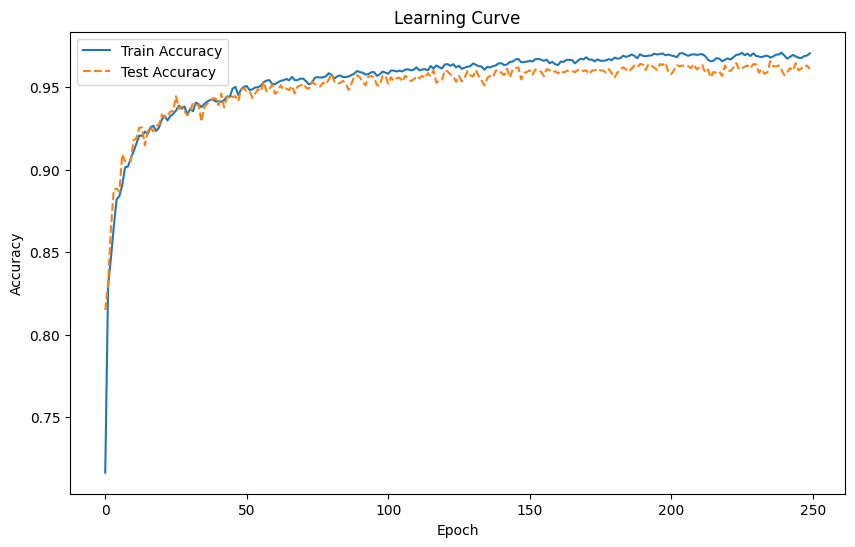

In [20]:
# Assuming x_train_sc has shape (number_of_samples, number_of_features)
# Make sure to replace 'number_of_features' with the actual number of features in your data.

# Define the model
model = Sequential()
# Add hidden layer
model.add(Dense(units=128, input_dim=x_train.shape[1], activation='tanh'))
# Add hidden layer
model.add(Dense(units=64, activation='relu'))
# # Add hidden layer
# model.add(Dense(units=32, activation='relu'))
# # Add hidden layer
model.add(Dense(units=16, activation='relu'))
# Add hidden layer
model.add(Dense(units=8, activation='relu'))
# Output layer
model.add(Dense(units=len(y_train.unique()), activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Print the model summary
# model.summary()
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
# model.summary()


# Custom callback for logging test accuracy at each epoch
class TestAccuracyLogger(Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_accuracies = []

    def on_epoch_end(self, epoch, logs=None):
        _, test_accuracy = self.model.evaluate(self.test_data[0], self.test_data[1], verbose=0)
        self.test_accuracies.append(test_accuracy)
        print(f'Test Accuracy after Epoch {epoch + 1}: {test_accuracy * 100:.2f}%')

# Assuming x_test_sc and y_test are your test data and labels
# Also, replace 'num_classes' with the actual number of classes in your classification task.

# Create an instance of the custom callback
test_accuracy_logger = TestAccuracyLogger(test_data=(x_test, y_test))

# Fit the model with the custom callback
history = model.fit(x_train, y_train, epochs=250, batch_size=32, validation_split=0.1, callbacks=[test_accuracy_logger])

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(test_accuracy_logger.test_accuracies, label='Test Accuracy', linestyle='dashed')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# # Fit the model
# # print(x_train_sc)
# model.fit(x_train_sc, y_encoded, epochs=100, batch_size=32, validation_split=0.1)

# # # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(x_test_sc, y_test_encoded)
# print("Test Accuracy: %.2f%%" % (test_accuracy * 100))
